## Penalized logistic regression
The cost function of logistic regression is defined as:
\begin{equation*}
J(\theta)=-\frac{1}{m}\sum_{i=1}^m[y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - h_{\theta}(x^{(i)}))]
\end{equation*}
to avoid stucking in local optimum.

On each of the paramter, the gradient decents for jth weight and bias are defined as:

\begin{equation*}
\theta_{j} :=\theta_{j}-\alpha\frac{\partial{}}{\partial{\theta_{j}}}J(\theta)
\end{equation*}
\begin{equation*}
b :=b-\alpha\frac{\partial{}}{\partial{b}}J(\theta)
\end{equation*}

Solving partial derivatives:

\begin{equation*}
\frac{\partial{}}{\partial{\theta_{j}}}J(\theta) = \frac{\partial{J(\theta)}}{\partial{h_{\theta}(x)}}\frac{\partial{h_{\theta}(x)}}{\partial{\theta_{j}}}
\end{equation*}

\begin{equation*}
\frac{\partial{}}{\partial{b}}J(\theta) = \frac{\partial{J(\theta)}}{\partial{h_{\theta}(x)}}\frac{\partial{h_{\theta}(x)}}{\partial{b}}
\end{equation*}

The first partial derivative is as:

\begin{equation*}
\frac{\partial{J(\theta)}}{\partial{h_{\theta}(x)}} = -\frac{1}{m}\sum_{i=1}^m[\frac{y^{(i)}}{h_{\theta}(x^{(i)})} - \frac{1-y^{(i)}}{1-h_{\theta}(x^{(i)})}]
\end{equation*}

The second partial derivative for jth weight and bias are:

\begin{equation*}
\frac{\partial{h_{\theta}(x)}}{\partial{\theta_{j}}} = -\frac{1}{m}\sum_{i=1}^m[x_j^{(i)}h_{\theta}(x^{(i)})(1-h_{\theta}(x^{(i)}))]
\end{equation*}

\begin{equation*}
\frac{\partial{h_{\theta}(x)}}{\partial{b}} = -\frac{1}{m}\sum_{i=1}^m[ h_{\theta}(x^{(i)})(1-h_{\theta}(x^{(i)}))]
\end{equation*}

Combine every terms:
\begin{equation*}
\theta_{j} :=\theta_{j}-\alpha \frac{1}{m}\sum_{i=1}^m x_j^{(i)}[h_{\theta}(x^{(i)}) - y^{(i)}]
\end{equation*}

\begin{equation*}
b :=b-\alpha \frac{1}{m}\sum_{i=1}^m [h_{\theta}(x^{(i)}) - y^{(i)}]
\end{equation*}

In [162]:
import numpy as np

# define function for weights initialization
def w_initialization(n):
    w = np.random.random_sample((n,))
    b = np.random.random_sample((1,))
    return w, b
    
# define function for delta weights initialization
def delta_w_initialization(n):
    delta_w = np.zeros((n,))
    delta_b = np.zeros((b,))
    return delta_w, delta_b
    
# define activation function
def sigmoid_activation(X, w, b):
    return 1 / (1 + np.exp(- X @ w - b))


def sigmoid_gradient(X, y, w, b):
    h_theta = sigmoid_activation(X, w, b)
    h_y = h_theta - y
    c = -y @ np.transpose(np.log(h_theta+0.001)) - (1 - y) @ np.transpose(np.log(1-h_theta+0.001))
    g_w = h_y @ X
    g_b = np.sum(h_y)
    return g_w, g_b, c

# define cost function
def train(X, y, alpha, lamda = 0.1, panelty = 'L1', n_iteration=3000):
    m, n = X.shape
    w, b = w_initialization(n)
    a = -alpha/m
    cnt = 0
    avg_cost = {}
    while cnt < n_iteration:
        cnt += 1
        if cnt % 1000 == 0:
            print('Epoch: {}'.format(cnt))
        g_w, g_b, c = sigmoid_gradient(X, y, w, b)
        if panelty == 'L1':
            r = lamda * abs(w)
        elif panelty == 'L2':
            r = lamda * w**2
        else:
            r = 0
        w +=  a * g_w + r
        b +=  a * g_b
        avg_cost[cnt-1] = c/m
    return w, b, avg_cost

def predict(X, w, b):
    return sigmoid_activation(X, w, b)

In [185]:
a = np.array([[1,2],[-1,-1], [-2,-4],[3,4]])
y = np.array((1,0,0,1))
print(a.shape)
w, b, avg_cost = train(a, y, 0.000025, 0.1, 'L2', 10)
print('Weights = {}, and bias = {}'.format(w, b))
print(predict(a, w, b))

(4, 2)
Weights = [0.54676327 0.31545657], and bias = [0.68937575]
[0.86611682 0.45689624 0.15896128 0.97318184]


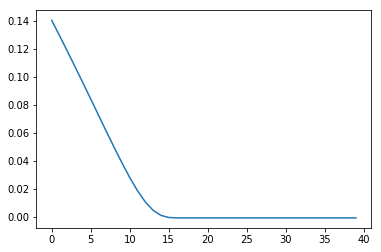

In [178]:
import matplotlib.pyplot as plt
plt.plot(avg_cost.values())
plt.show()